機械学習特論 第6回 勾配ブースティング で mnist を分類

In [1]:
# google colab で実行する場合は、次の行の先頭の # を削除してこのブロックを実行する
#!pip install japanize-matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [2]:
from sklearn.datasets import fetch_openml
# 手書き文字のデータセットをダウンロードして、実験用データを準備 (70000枚のうち7000枚を利用)
mnist_data = fetch_openml('mnist_784', version=1)
_x = np.array(mnist_data['data'].astype(np.float32))
_y = np.array(mnist_data['target'].astype(np.int32))
_, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1)

In [3]:
# データを学習用と検証用に分割
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=2) # 検証用データに25%を割当て
print(f'x_train:{len(x_train)} x_test:{len(x_test)} y_train:{len(y_train)} y_test:{len(y_test)}')

x_train:5250 x_test:1750 y_train:5250 y_test:1750


In [6]:
# 学習データを利用して勾配ブースティングを学習
clf = GradientBoostingClassifier(max_depth=5, # 木の深さの最大を設定
                                 random_state=1) # 乱数シード
clf = clf.fit(x_train, y_train)

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
predict_train = clf.predict(x_train)
predict_test = clf.predict(x_test)
print('max_depth=5, accuracy_score: ', 
      f'train data : {metrics.accuracy_score(y_train, predict_train): 0.5}', 
      f'test data : {metrics.accuracy_score(y_test, predict_test): 0.5}')

max_depth=5, accuracy_score:  train data :  1.0 test data :  0.92686


In [8]:
# 木の数を変えて学習したアダブーストの性能を学習用データと検証用データで確認
N = 10
_x = np.linspace(20, N*20, N) # グラフのx軸の設定 (1から7までの7点)
dct_train_score = [] # グラフ用のリスト
dct_test_score = []
adb_train_score = [] # グラフ用のリスト
adb_test_score = [] 
for i in range(N):
    # 学習データを利用して勾配ブースティングを学習
    clf = GradientBoostingClassifier(max_depth=5,  # 木の深さの最大を設定
                                     n_estimators=(i+1)*20, # 木の数は20ずつ増やして性能を計測
                                     random_state=1) # 乱数シード
    clf = clf.fit(x_train, y_train) 

    # 学習したモデルの性能(正答率)を学習用データと検証用データで評価
    predict_train = clf.predict(x_train)
    adb_train_score.append(metrics.accuracy_score(y_train, predict_train))
    predict_test = clf.predict(x_test)
    adb_test_score.append(metrics.accuracy_score(y_test, predict_test))
    print(f'GB n_estimators={(i+1)*20}, accuracy_score: ', 
            f'train data : {adb_train_score[i]: 0.5}', 
            f'test data : {adb_test_score[i]: 0.5}')

GB n_estimators=20, accuracy_score:  train data :  0.98857 test data :  0.89486
GB n_estimators=40, accuracy_score:  train data :  1.0 test data :  0.90743
GB n_estimators=60, accuracy_score:  train data :  1.0 test data :  0.91429
GB n_estimators=80, accuracy_score:  train data :  1.0 test data :  0.91943
GB n_estimators=100, accuracy_score:  train data :  1.0 test data :  0.92686
GB n_estimators=120, accuracy_score:  train data :  1.0 test data :  0.92571
GB n_estimators=140, accuracy_score:  train data :  1.0 test data :  0.92743
GB n_estimators=160, accuracy_score:  train data :  1.0 test data :  0.92914
GB n_estimators=180, accuracy_score:  train data :  1.0 test data :  0.928
GB n_estimators=200, accuracy_score:  train data :  1.0 test data :  0.92971


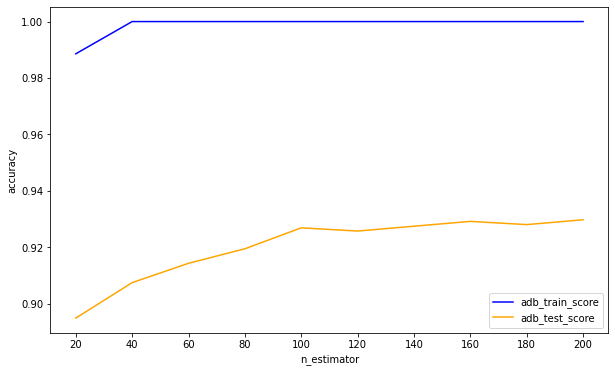

In [10]:
# 木の深さに対する決定木の性能をグラフで表示
plt.figure(figsize=[10,6])
plt.plot(_x, adb_train_score, label='adb_train_score', color="blue")
plt.plot(_x, adb_test_score, label='adb_test_score', color="orange")
plt.xlabel('n_estimator')
plt.ylabel('accuracy')
plt.xticks(_x)
plt.legend()
plt.show()